<img style="float: left;" src="C:/Users/dmari_000/Documents/GitHub/education/R/images/header2_R.png">


Modèle prédictif de régression linéaire
=============  

### Auteur: 
- Marie-Joël Dandoga, VP-Education 2019-2020

### Table des matières

- [Section 1. Intuition sous-jacente à la régression linéaire](#intuition)
- [Section 2. Importation et Prétraitement des données](#pre-processing)
- [Section 3. Modélisation](#modelling)
- [Section 4. Prédictions et performence prévisionnelle](#prediction)

<a id="intuition"></a>
# Section 1: Intuition sous-jacente à la régression linéaire

Le but ultime du modèle de régression linéaire est de parvenir à expliquer le comportement d'une variable *__Y__* dite **dépendante** par une ou plusieurs variables *__X__* dites **indépendantes** ou **explicatives**. Lorsque le modèle comporte une seule variable explicative il s'agit d'un modèle de régression linéaire simple, tandis que lorsqu'il y a plusieurs variables explicatives, on parle de régression linéaire multiple.

L'équation du modèle est la suivante:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon $$
où:
- $\beta_i$ représente le coefficient associé à la ième variable explicative X
- $\epsilon$ représente l'erreur aléatoire supposée provenant d'une loi normale de moyenne 0 et de variance $\sigma^2$

Typiquement le modèle correspond à la droite (régression linéaire simple) ou à un plan (régression linéaire multiple à deux régresseurs) qui s'ajuste le mieux aux données. C'est-à-dire qui minimise la somme des écarts  au carré: c'est le critère des moindres carrées ordinaires.

Plusieurs analyses interessantes peuvent être faites avec de tels modèles. On peut penser notamment à:
- faire des test d'hypothèses sur la significativité des coefficients et les interpréter
- vérifier l'indépendance des $X_i$
- vérifier l'égaliter des variances entre les observations
- faire de la prévision
- ...

Ici, l'accent sera mis entre autre sur la prédiction.

<a id="pre-processing"></a>
# Section 2: Importation et pré-traitement des données

Le jeu de données que je vous propose d'explorer sous la loupe de la régression linéaire provient de <https://www.kaggle.com/augustus0498/life-expectancy-who>. L'ensemble de données est relatif à l'espérance de vie et aux facteurs économiques et de santé pour 193 pays entre les années 2000 et 2015. Ces observations sont compilés sur les sites Web de banques de données de l'OMS et des Nations Unies. Parmi toutes les catégories de facteurs liés à la santé, seuls les facteurs critiques plus représentatifs ont été choisis. Il s'agit de 22 variables mesurées sur 2938 individus:

- Country: Pays
- Year: Année
- Status:Statut développé ou en développement
- Lifeexpectancy: Espérance de vie en âge (**variable à expliquer**)
- AdultMortality: Taux de mortalité des adultes des deux sexes (probabilité de mourir entre 15 et 60 ans pour 1000 habitants)
- infantdeaths: Nombre de décès de nourrissons pour 1000 habitants
- Alcohol: Alcool, consommation enregistrée par habitant (15 ans et plus) (en litres d'alcool pur)
- percentageexpenditure: Dépenses de santé en pourcentage du produit intérieur brut par habitant (%)
- HepatitisB: Couverture vaccinale contre l'hépatite B (HepB) chez les enfants âgés d'un an (%)
- Measles: Rougeole - nombre de cas signalés pour 1000 habitants
- BMI: Indice de masse corporelle moyenne de la population entière
- under-fivedeaths: Nombre de décès d'enfants de moins de cinq ans pour 1000 habitants
- Polio: Couverture vaccinale contre la polio (Pol3) chez les enfants de 1 an (%)
- Totalexpenditure: Dépenses des administrations publiques en santé exprimées en pourcentage des dépenses totales des administrations publiques (%)
- Diphteria: Couverture vaccinale vaccinale chez les enfants âgés de 1 an contre l'anatoxine tétanique et la coqueluche (DTC3) (%)
- HIV/AIDS: Décès pour 1 000 naissances vivantes VIH / SIDA (0 à 4 ans)
- GDP: Produit intérieur brut par habitant (en USD)
- Population: Population du pays
- thinness1-19years: Prévalence de la minceur chez les enfants et les adolescents de 10 à 19 ans (%)
- thinness5-9years: Prévalence de la minceur chez les enfants de 5 à 9 ans (%)
- Incomecompositionofresources: Indice de développement humain en termes de composition du revenu des ressources (indice allant de 0 à 1)
- Schooling: Nombre d'années de scolarité (années)

In [1]:
# Importation du jeu de données
dataset <- read.csv("C:/Users/dmari_000/Desktop/Maîtrise/CSD/Ateliers-R/Atelier 2/led.csv")

In [2]:
head(dataset[dataset$Year==2015,])

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness1.19years,thinness5.9years,Incomecompositionofresources,Schooling
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,...,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
17,Albania,2015,Developing,77.8,74,0,4.60,364.97523,99,0,...,99,6.00,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2
33,Algeria,2015,Developing,75.6,19,21,NA,0.00000,95,63,...,95,NA,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,NA,0.00000,64,118,...,7,NA,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4
65,AntiguaandBarbuda,2015,Developing,76.4,13,0,NA,0.00000,99,0,...,86,NA,99,0.2,13566.9541,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,NA,0.00000,94,0,...,93,NA,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3


In [3]:
dim(dataset)

[1] 2938   22

## Résumé numérique des variables
Dans cette sous section, on présente quelques statistiques descriptives des variables.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  36.30   63.10   72.10   69.22   75.70   89.00      10 

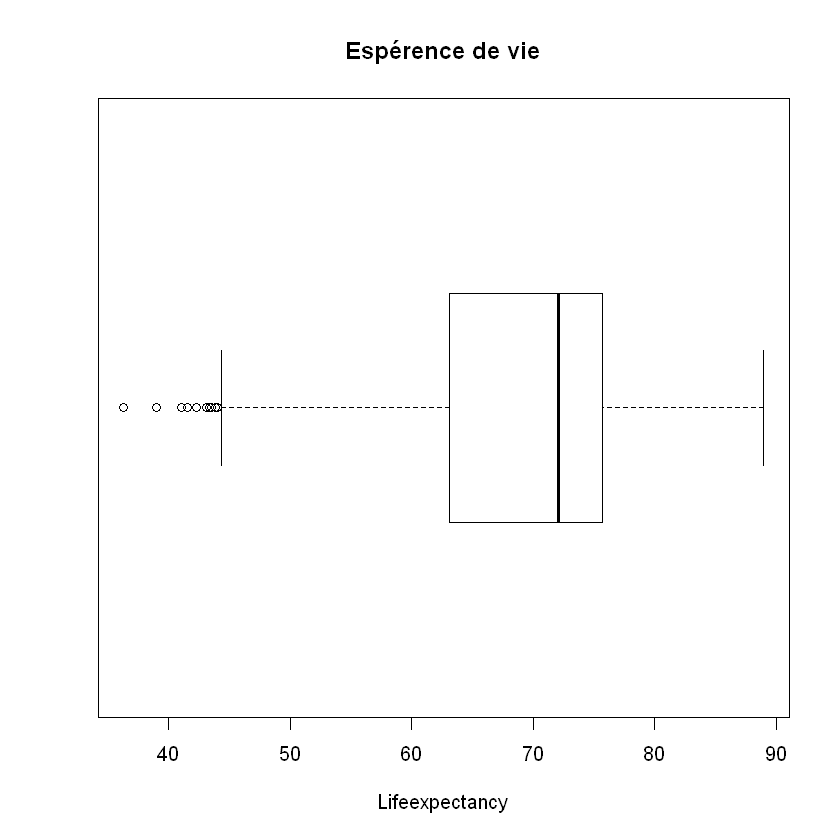

In [4]:
attach(dataset)

# Variable d'intérêt: Lifeexpectancy
summary(Lifeexpectancy)
boxplot(Lifeexpectancy,horizontal=T,main="Espérence de vie",xlab="Lifeexpectancy")

In [5]:
# Variables explicatives quantitatives
summary(AdultMortality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    74.0   144.0   164.8   228.0   723.0      10 

In [6]:
summary(infantdeaths)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     3.0    30.3    22.0  1800.0 

Très grande variabilité dans le nombre de décès de nourrissons pour 1000 habitants

In [7]:
summary(Alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0100  0.8775  3.7550  4.6029  7.7025 17.8700     194 

In [8]:
summary(percentageexpenditure)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     4.685    64.913   738.251   441.534 19479.912 

In [9]:
summary(HepatitisB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   77.00   92.00   80.94   97.00   99.00     553 

Beaucoup de valeurs manquantes ici!

### Exercice 1
Ecrivez un code qui affiche automatiquement le nom et le résumé numérique de chacunes des variables explicatives subséquentes.
- **INDICE:** Il s'agit des colonnes 10 à 22 du jeu de donnée; pensez à utiliser une boucle *for*.
- Que constatez-vous?

In [10]:
# Variables explicatives qualitatives
table(Country)
table(Status)


Country
                                  Afghanistan 
                                           16 
                                      Albania 
                                           16 
                                      Algeria 
                                           16 
                                       Angola 
                                           16 
                            AntiguaandBarbuda 
                                           16 
                                    Argentina 
                                           16 
                                      Armenia 
                                           16 
                                    Australia 
                                           16 
                                      Austria 
                                           16 
                                   Azerbaijan 
                                           16 
                                      Bahamas 
     

Status
 Developed Developing 
       512       2426 

Plusieurs Pays ont seulement des observations pour une année.

## Résumé graphique des variables
Etant donné qu'on veut ajuster un modèle de régression linéaire aux données, il est primordial de s'assurer qu'il existe bien une relation linéaire entre l'espérence de vie et les variables explicatives considérées. C'est l'une des quatre principales hypothèse du modèle (qu'on regardera brièvement plus bas) qui stipule que le modèle linéaire est bien spécifié et que toutes les variables importantes du modèle y sont bien incluses, sous la bonne forme. Le cas échéant on fera les transformations adéquates dans la mesure du possible.

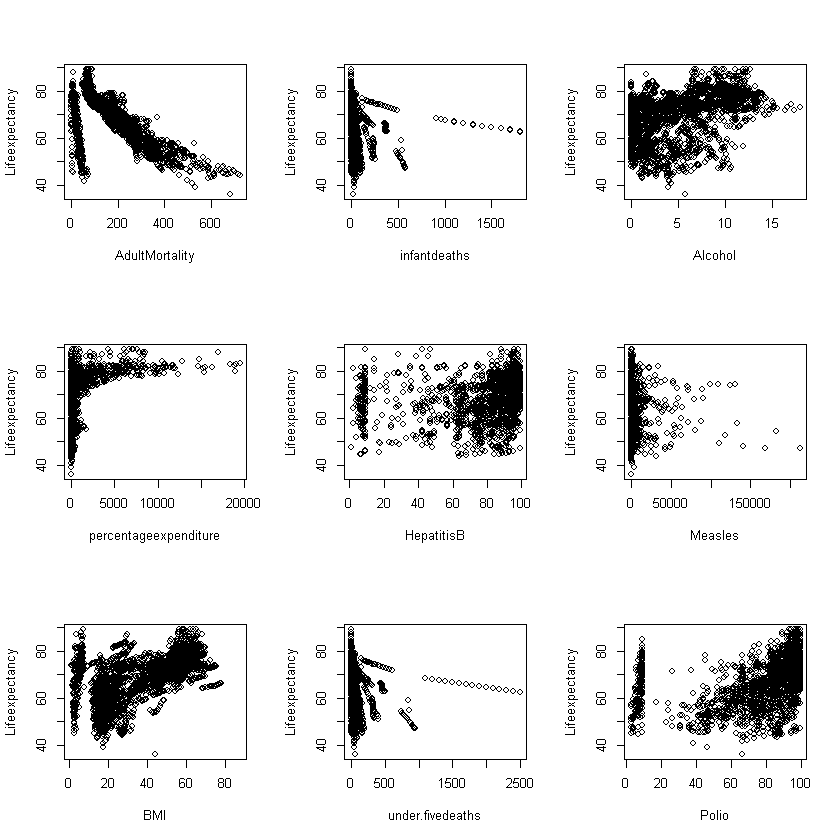

In [11]:
# Pour les variables quantitatives 

par(mfrow=c(3,3))
for(i in c(5:13)){
    plot(dataset[,i], Lifeexpectancy, xlab=colnames(dataset[i]), ylab="Lifeexpectancy")
}

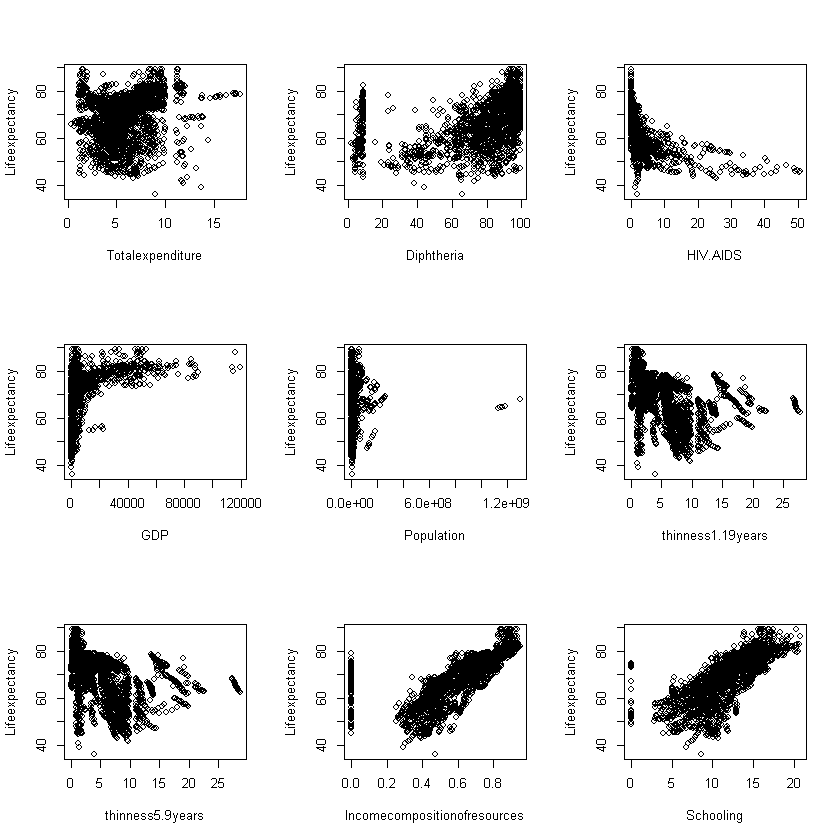

In [12]:
par(mfrow=c(3,3))
for(i in c(14:22)){
    plot(dataset[,i], Lifeexpectancy, xlab=colnames(dataset[i]), ylab="Lifeexpectancy")
}

Pour la majorité des variables explicatives, il semble y avoir beaucoup de valeurs à zéro. La plupart des variables semblent être linéairement liées avec l'espérence de vie quand on fait abstraction des zéros. Toutefois, il serait intérressant de considérer:
- une composante quadratique de thinness5.9years, thinness1.19years et HIV.AIDS
- une composante logarithmique de population et GDP.

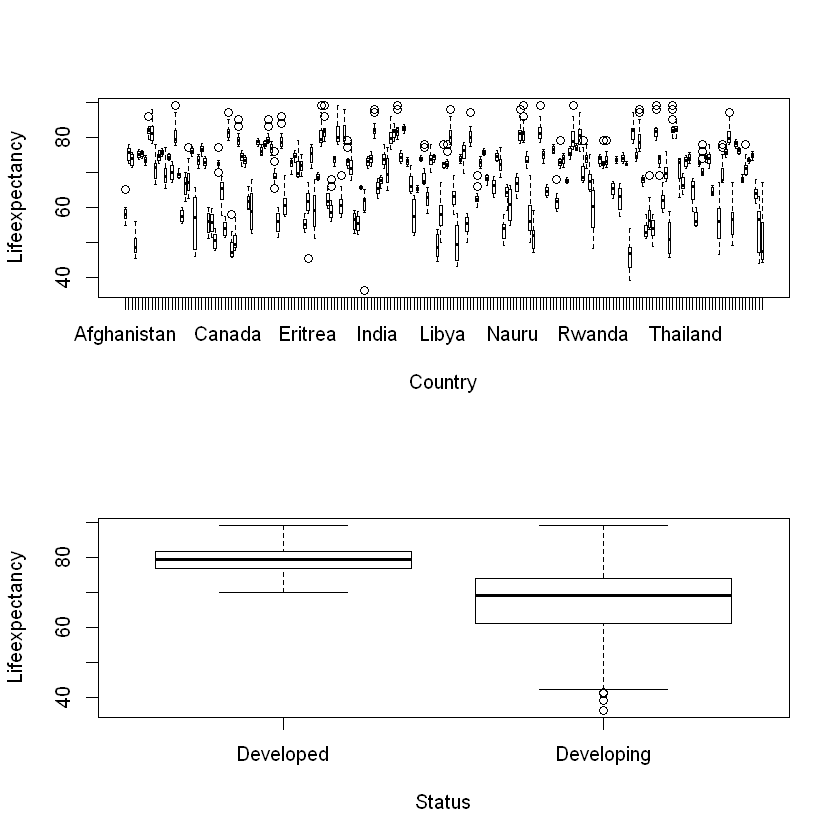

In [13]:
# Pour les variables qualitatives 

par(mfrow=c(2,1))
for(i in c(1,3)){
    boxplot(Lifeexpectancy~dataset[,i], xlab=colnames(dataset[i]), ylab="Lifeexpectancy")
}


L'espérence de vie varie énormément d'un pays à l'autre et est clairement plus élevée dans les pays développés.

### Exercice 2
Réalisez un résumé graphique de la variable Year dans un premier temps comme variable quantitative et dans un deuxième temps come variable qualitative.
- selon vous sous quelle forme devrait-elle être introduite dans le modèle?

In [14]:
# Création des nouvelles variables

dataset$thinness5.9years2         = dataset$thinness5.9years^2
dataset$thinness1.19years2        = dataset$thinness1.19years^2 
dataset$HIV.AIDS2                 = dataset$HIV.AIDS^2
dataset$log_Population            = log(dataset$Population)
dataset$log_GDP                   = log(dataset$GDP)

dim(dataset)

[1] 2938   27

In [15]:
set.seed(0611)

## Sample
La commande sample permet de choisir, parmi un ensemble spécifié, un échantillon de taille donnée, avec ou sans remise. On l'utilise ici pour opérer le choix de l'année.

In [16]:
cible = sample(Year, 1, replace = F)
cible

[1] 2014

In [17]:
mydata = dataset[(Year==cible) & (Status=="Developing"),]
dim(mydata)
mydata

[1] 151  27

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Population,thinness1.19years,thinness5.9years,Incomecompositionofresources,Schooling,thinness5.9years2,thinness1.19years2,HIV.AIDS2,log_Population,log_GDP
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,...,327582,17.5,17.5,0.476,10.0,306.25,306.25,0.01,12.69949,6.417870
18,Albania,2014,Developing,77.5,8,0,4.51,428.74907,98,0,...,288914,1.2,1.3,0.761,14.2,1.69,1.44,0.01,12.57388,8.428529
34,Algeria,2014,Developing,75.4,11,21,0.01,54.23732,95,0,...,39113313,6.0,5.8,0.741,14.4,33.64,36.00,0.01,17.48197,6.306005
50,Angola,2014,Developing,51.7,348,67,8.33,23.96561,64,11699,...,2692466,8.5,8.3,0.527,11.4,68.89,72.25,4.00,14.80597,6.172352
66,AntiguaandBarbuda,2014,Developing,76.2,131,0,8.56,2422.99977,99,0,...,NA,3.3,3.3,0.782,13.9,10.89,10.89,0.04,NA,9.464075
82,Argentina,2014,Developing,76.2,118,8,7.93,847.37175,94,1,...,42981515,1.0,0.9,0.825,17.3,0.81,1.00,0.01,17.57628,9.412894
98,Armenia,2014,Developing,74.6,12,1,3.91,295.60871,93,13,...,29622,2.1,2.1,0.739,12.7,4.41,4.41,0.01,10.29627,8.292727
146,Azerbaijan,2014,Developing,72.5,119,5,0.01,306.18243,94,0,...,953579,2.8,2.9,0.752,12.2,8.41,7.84,0.01,13.76798,8.973516
162,Bahamas,2014,Developing,75.4,16,0,9.45,0.00000,96,0,...,NA,2.5,2.5,0.789,12.6,6.25,6.25,0.01,NA,NA
178,Bahrain,2014,Developing,76.8,7,0,1.57,367.25567,98,46,...,NA,6.1,6.0,0.820,14.5,36.00,37.21,0.01,NA,10.125966


## Imputation
Les valeurs manquantes sont un soucis à bien des égards. Différentes méthodes d'imputation existent. On propose ici une technique d'imputation par la moyenne.

In [18]:
for(i in 5:27){
    mydata[,i] = ifelse(is.na(mydata[,i]),
                     ave(mydata[,i], FUN = function(x) mean(x, na.rm = TRUE)),
                     mydata[,i])
}
                        
mydata

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Population,thinness1.19years,thinness5.9years,Incomecompositionofresources,Schooling,thinness5.9years2,thinness1.19years2,HIV.AIDS2,log_Population,log_GDP
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,...,327582,17.5,17.5,0.4760000,10.00000,306.25,306.25,0.01,12.69949,6.417870
18,Albania,2014,Developing,77.5,8,0,4.51,428.74907,98,0,...,288914,1.2,1.3,0.7610000,14.20000,1.69,1.44,0.01,12.57388,8.428529
34,Algeria,2014,Developing,75.4,11,21,0.01,54.23732,95,0,...,39113313,6.0,5.8,0.7410000,14.40000,33.64,36.00,0.01,17.48197,6.306005
50,Angola,2014,Developing,51.7,348,67,8.33,23.96561,64,11699,...,2692466,8.5,8.3,0.5270000,11.40000,68.89,72.25,4.00,14.80597,6.172352
66,AntiguaandBarbuda,2014,Developing,76.2,131,0,8.56,2422.99977,99,0,...,25139118,3.3,3.3,0.7820000,13.90000,10.89,10.89,0.04,14.16980,9.464075
82,Argentina,2014,Developing,76.2,118,8,7.93,847.37175,94,1,...,42981515,1.0,0.9,0.8250000,17.30000,0.81,1.00,0.01,17.57628,9.412894
98,Armenia,2014,Developing,74.6,12,1,3.91,295.60871,93,13,...,29622,2.1,2.1,0.7390000,12.70000,4.41,4.41,0.01,10.29627,8.292727
146,Azerbaijan,2014,Developing,72.5,119,5,0.01,306.18243,94,0,...,953579,2.8,2.9,0.7520000,12.20000,8.41,7.84,0.01,13.76798,8.973516
162,Bahamas,2014,Developing,75.4,16,0,9.45,0.00000,96,0,...,25139118,2.5,2.5,0.7890000,12.60000,6.25,6.25,0.01,14.16980,7.493295
178,Bahrain,2014,Developing,76.8,7,0,1.57,367.25567,98,46,...,25139118,6.1,6.0,0.8200000,14.50000,36.00,37.21,0.01,14.16980,10.125966


## Sample.split
La commande **sample.split** du package **caTools** permet de séparer de façon aléatoire un jeu de données. Nous l'utiliserons ici pour séparer notre jeu de données en ensemble d'apprentissage *dataset.train* sur lequel on fera l'ajustement des modèles et en ensemble de test *dataset.test* qui servira à valider l'efficacité de nos prédictions.

In [19]:
#install.packages("caTools")
library(caTools)

split = sample.split(mydata$Lifeexpectancy, SplitRatio = 0.8)
data_train = subset(mydata, split == TRUE )
data_test  = subset(mydata, split == FALSE)

nrow(data_train)
nrow(data_test)

[1] 120

[1] 31

<a id="modelling"></a>
# Section 3: modélisation


On commence par ajuster un premier modèle dit "naïf" qui ne prend pas vraiment en compte l'analyse préliminaire. Et par la suite on ajuste un second modèle plus complexe. Les variables Country, Year et Status ne sont pas incluses pour des raisons évidentes.

In [20]:
model1 = lm(data_train$Lifeexpectancy~., data=data_train[,4:22])
summary(model1)


Call:
lm(formula = data_train$Lifeexpectancy ~ ., data = data_train[, 
    4:22])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7713  -1.7034   0.1093   1.9743   9.3190 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.101e+01  3.982e+00  12.810  < 2e-16 ***
AdultMortality               -1.183e-02  4.963e-03  -2.383 0.019031 *  
infantdeaths                  3.321e-02  6.859e-02   0.484 0.629329    
Alcohol                      -5.219e-02  1.323e-01  -0.394 0.694066    
percentageexpenditure         1.414e-03  7.691e-04   1.838 0.068995 .  
HepatitisB                    3.265e-02  3.355e-02   0.973 0.332804    
Measles                      -1.087e-04  1.050e-04  -1.035 0.303177    
BMI                          -1.258e-03  2.310e-02  -0.054 0.956674    
under.fivedeaths             -3.101e-02  4.700e-02  -0.660 0.510953    
Polio                         7.590e-04  2.731e-02   0.028 0.977881    
Totale

In [21]:
model2 = lm(data_train$Lifeexpectancy~., data=data_train[,4:27])
summary(model2)


Call:
lm(formula = data_train$Lifeexpectancy ~ ., data = data_train[, 
    4:27])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0455  -1.2663  -0.0118   1.6104   7.6970 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.412e+01  5.035e+00  10.750  < 2e-16 ***
AdultMortality               -1.213e-02  4.658e-03  -2.604  0.01069 *  
infantdeaths                 -1.115e-01  7.450e-02  -1.496  0.13782    
Alcohol                      -1.086e-01  1.303e-01  -0.833  0.40688    
percentageexpenditure         7.530e-04  7.357e-04   1.023  0.30865    
HepatitisB                    7.478e-03  3.275e-02   0.228  0.81987    
Measles                      -6.100e-05  1.020e-04  -0.598  0.55134    
BMI                          -2.707e-02  2.223e-02  -1.218  0.22624    
under.fivedeaths              6.719e-02  5.243e-02   1.282  0.20306    
Polio                         3.488e-02  2.810e-02   1.241  0.21754    
Totale

Dans un contexte de prédiction, ce qui va nous intéresser dans cette section c'est le $R^2$ **ajusté** et le **Residual standard error**. En effet, le **$R^2$ ajusté** mesure la proportion de variabilité de la variable réponse expliquée par le modèle et le **Residual standard error** est relié au **MSE** (quantité qu'on veut minimiser) de la façon suivante:
$$ Residual standard error = \sqrt{MSE/(n-p)} $$
où
- n est le nombre d'observation et
- p le nombre de paramètres du modèle (dans un contexte de regression linéaire, il s'agit du nombre de variables explicatives y compris la constante).

Ici on remarque qu'il y a un gain considérable entre le modèle 1 et le modèle 2. La décision finale sera basée sur la performence prévisionnelle des modèle.

Par ailleurs, on se gardera d'interprêter les coefficients estimés et leur significatifité d'autant plus qu'on a pas encore vérifier les hypothèses de validiter du modèle à savoir:
- l'indépendance entre les prédicteurs d'une part et la réponse d'autre part,
- la normalité des résidus,
- l'homoscédasticité ou égalité des variances.

Ceci n'est pas grave puisqu'on utilise uniquement l'approche prédictif du modèle et non l'approche inférence.

<a id="prediction"></a>
# Section 4: Prédictions et performence prévisionnelle

## Prédictions
Pour faire les prédictions on utilise la fonction **predict.lm** qui prend en argument le modèle utilisé et le jeu de donnée pour la généralisation.


In [22]:
# Modèle 1
E.vie1 = predict.lm(model1, data_test)
head(E.vie1)

18       66      354      546      562      772 
76.39987 77.55109 74.71738 80.56411 67.13359 72.79930

In [23]:
# Modèle 2
E.vie2 = predict.lm(model2, data_test)
head(E.vie2)

18       66      354      546      562      772 
77.34787 76.21702 72.98745 80.97409 65.98956 69.00898

## Performence prévisionnelle
Ici il s'agira de comparer, pour chaque modèle, les valeurs prédites pour le prix des maisons aux vraies valeurs.

In [24]:
# modèle 1
head(cbind(data_test$Lifeexpectancy, E.vie1))

,,E.vie1
18,77.5,76.39987
66,76.2,77.55109
354,74.8,74.71738
546,83.0,80.56411
562,75.8,67.13359
772,73.6,72.79930


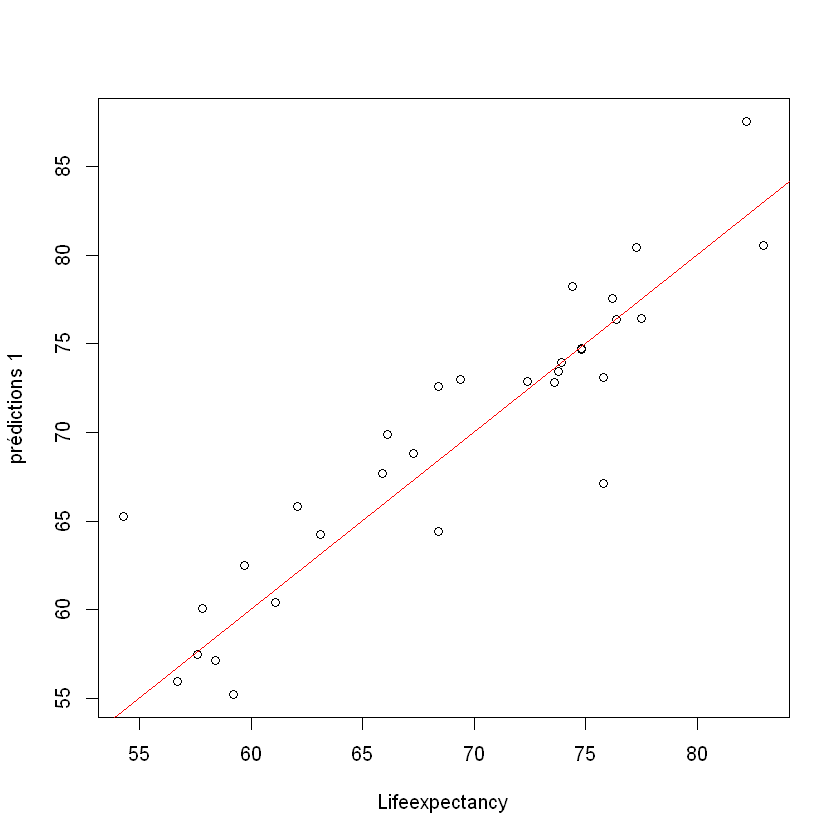

In [25]:
plot(data_test$Lifeexpectancy, E.vie1, xlab="Lifeexpectancy", ylab="prédictions 1")
abline(0,1, col="red")

In [26]:
MSE1 = mean((data_test$Lifeexpectancy - E.vie1)^2)
MSE1

[1] 12.18828

In [27]:
# modèle 2
head(cbind(data_test$Lifeexpectancy, E.vie2))

,,E.vie2
18,77.5,77.34787
66,76.2,76.21702
354,74.8,72.98745
546,83.0,80.97409
562,75.8,65.98956
772,73.6,69.00898


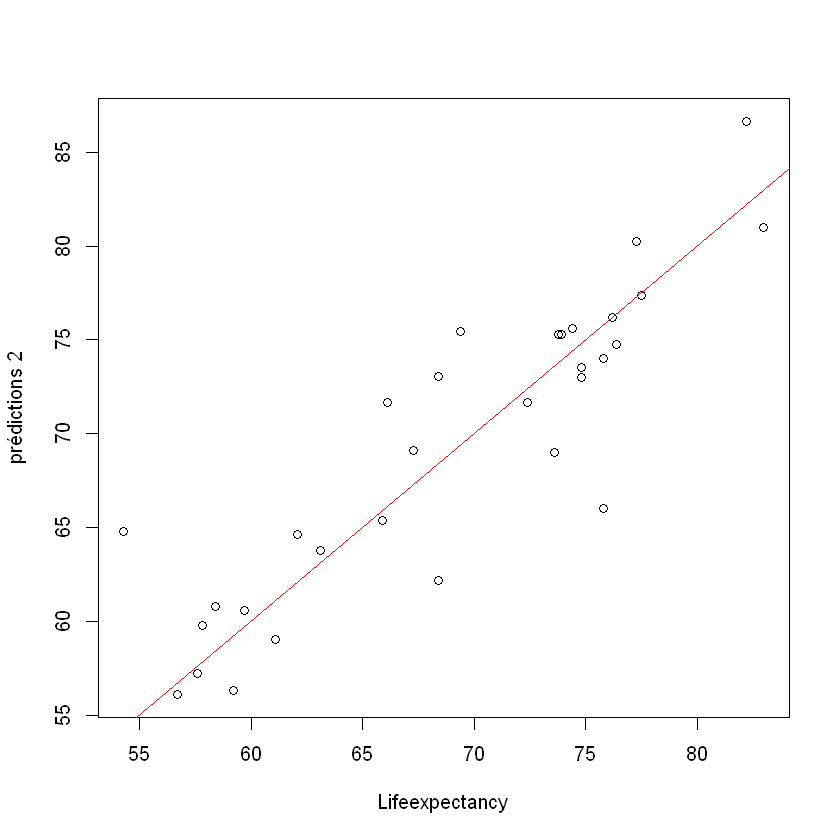

In [28]:
plot(data_test$Lifeexpectancy, E.vie2, xlab="Lifeexpectancy", ylab="prédictions 2")
abline(0,1, col="red")

In [29]:
MSE2 = mean((data_test$Lifeexpectancy - E.vie2)^2)
MSE2

[1] 14.14746

## Conclusion
Somme toutes, le modèle 2 a une meilleure aptitude à s'ajuster à l'ensemble d'apprentissage que le modèle 1. Toutefois, l'erreur de test du modèle 1 est plus petite (mais de peu) que celle du modèle 1.

### Exercice 4
- Refaites toute l'analyse prédictive sur les pays développés en 2015.
- Refaites toute l'analyse prédictive pour le Canada uniquement en 2015.

## Référence
Inspiré des notes du cours 3 Apprentissage Statistique, Aurélie Labbe, Automne 2019.